<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#GMM" data-toc-modified-id="GMM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>GMM</a></span><ul class="toc-item"><li><span><a href="#GMM-(Sport-+-Politics)" data-toc-modified-id="GMM-(Sport-+-Politics)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>GMM (Sport + Politics)</a></span><ul class="toc-item"><li><span><a href="#BIC-und-AIC" data-toc-modified-id="BIC-und-AIC-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>BIC und AIC</a></span></li><li><span><a href="#Hard-Clustering" data-toc-modified-id="Hard-Clustering-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Hard Clustering</a></span></li><li><span><a href="#Soft-Clustering" data-toc-modified-id="Soft-Clustering-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Soft Clustering</a></span></li></ul></li><li><span><a href="#GMM-(Sport+Politics+Tech)" data-toc-modified-id="GMM-(Sport+Politics+Tech)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>GMM (Sport+Politics+Tech)</a></span><ul class="toc-item"><li><span><a href="#Daten-vorbereiten" data-toc-modified-id="Daten-vorbereiten-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Daten vorbereiten</a></span></li><li><span><a href="#BIC-und-AIC" data-toc-modified-id="BIC-und-AIC-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>BIC und AIC</a></span></li><li><span><a href="#Hard-Clustering" data-toc-modified-id="Hard-Clustering-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Hard Clustering</a></span></li><li><span><a href="#Soft-Clustering" data-toc-modified-id="Soft-Clustering-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Soft Clustering</a></span></li></ul></li></ul></li></ul></div>

# Imports

In [33]:
import pandas as pd
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('../../Datensaetze/news_POS_POS_tags_nouns_adjectives_verb.csv')
df.head(2)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,415.0,244.0,quarterli profit at US media giant timewarn j...,"['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...",high fourth own fourth underlying exceptional ...,74.0,22.0,1.0
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,379.0,230.0,the dollar ha hit it highest level against th...,"['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...",late recent sanguine current current next shar...,66.0,30.0,9.0


In [35]:
df.shape

(2225, 12)

# GMM

## GMM (Sport + Politics)

In [36]:
data = df[(df.category=='sport')|(df.category=='politics')]
data.head(1)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
896,politics,001.txt,Labour plans maternity pay rise,Maternity pay for new mothers is to rise by £...,445.0,232.0,"matern pay for new mother is to rise by £1,40...","['_SP', 'NNP', 'NN', 'IN', 'JJ', 'NNS', 'VBZ',...",new new Other desperate full next new many fir...,47.0,27.0,8.0


In [37]:
data.shape

(928, 12)

In [39]:
tf_idf_vectorizor = TfidfVectorizer(max_features=1000,
                                    stop_words="english")
tf_idf = tf_idf_vectorizor.fit_transform(data.content)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

### BIC und AIC

Die Wahl der Anzahl der Komponenten misst wie gut GMM als density estimator funktioniert, nicht wie gut es als Clustering Algorithmus funktioniert.

Text(0.5, 0, 'n_components')

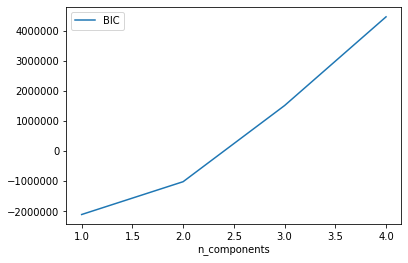

In [40]:
n_components = np.arange(1, 5)
models = [GaussianMixture(n, n_init=10, covariance_type='full', random_state=0).fit(tf_idf_array)
          for n in n_components]

plt.plot(n_components, [m.bic(tf_idf_array) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components')

Text(0.5, 0, 'n_components')

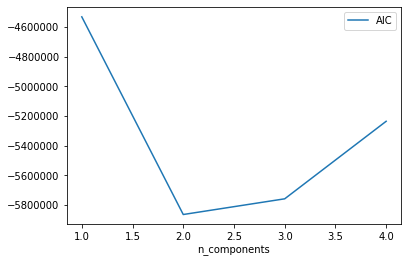

In [41]:
plt.plot(n_components, [m.aic(tf_idf_array) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [9]:
def compute_PCA(text):
    pca = PCA(n_components = 2)
    Y = pca.fit_transform(text)
    return Y

In [42]:
def plot_PCA(Y, prediction):
    plt.figure(figsize=(15,10))
    plt.scatter(Y[:, 0], Y[:, 1], c=prediction, s=50, cmap='viridis')
    plt.title('PCA')
    #plt.savefig('', bbox_inches = "tight")

### Hard Clustering 

Visualisieren mit PCA

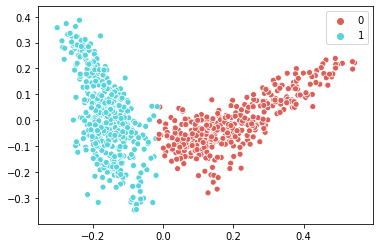

In [43]:
gmm = GaussianMixture(n_components=2, n_init=10, covariance_type='full').fit(tf_idf_array)
prediction = gmm.predict(tf_idf_array)
Y = compute_PCA(tf_idf_array)
sns.scatterplot(Y[:, 0], Y[:, 1],hue=prediction, palette=sns.color_palette("hls", len(np.unique(prediction))))

In [44]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[0.02240949 0.         0.00807441 ... 0.01623974 0.00809855 0.00047193]
 [0.00505357 0.00752141 0.01193202 ... 0.01646188 0.00660045 0.00973326]]


[[[ 3.33117400e-03  0.00000000e+00  2.48121851e-04 ...  7.30946376e-05
   -2.12928657e-05  2.59559161e-05]
  [ 0.00000000e+00  1.00000000e-06  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.48121851e-04  0.00000000e+00  4.99163742e-04 ...  1.07492897e-04
   -3.72002727e-05  3.26284987e-05]
  ...
  [ 7.30946376e-05  0.00000000e+00  1.07492897e-04 ...  8.53316908e-04
   -8.59824784e-05  8.98436842e-06]
  [-2.12928657e-05  0.00000000e+00 -3.72002727e-05 ... -8.59824784e-05
    1.17390092e-03 -3.82190971e-06]
  [ 2.59559161e-05  0.00000000e+00  3.26284987e-05 ...  8.98436842e-06
   -3.82190971e-06  5.33200139e-05]]

 [[ 7.67451198e-04  6.34208491e-05  6.56917122e-05 ... -4.34028073e-05
   -1.89049582e-05 -1.29889668e-05]
  [ 6.34208491e-05  1.79280692e-03  5.22897582e-04 ...  6.88872039e-05
   -4.00057048e-05 -7.3

### Soft Clustering

In [45]:
probs = gmm.predict_proba(tf_idf_array)
print(probs[:5].round(3))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


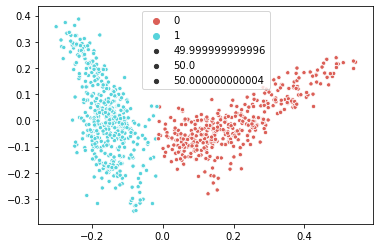

In [46]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
sns.scatterplot(Y[:, 0], Y[:, 1],hue=prediction, palette=sns.color_palette("hls", len(np.unique(prediction))), size=size)

Visualisieren mit TSNE

In [50]:
def visualize_tsne(X_embedded, hue):
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(frameon=False)
    plt.setp(ax, xticks=(), yticks=())
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    num = len(np.unique(hue))
    markers = ('o', 'v', '^', 's', 'p', '*','d', 'P', 'X')
    sns.scatterplot(Y[:, 0], Y[:, 1],hue=prediction, style=data.category, markers=markers, palette=sns.color_palette("hls", len(np.unique(prediction))))
    plt.title("Kategorien")
    #plt.savefig(" ")
    plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 928 samples in 0.201s...
[t-SNE] Computed neighbors for 928 samples in 1.549s...
[t-SNE] Computed conditional probabilities for sample 928 / 928
[t-SNE] Mean sigma: 0.382468
[t-SNE] Computed conditional probabilities in 0.071s
[t-SNE] Iteration 50: error = 185.1931763, gradient norm = 0.2696772 (50 iterations in 0.583s)
[t-SNE] Iteration 100: error = 185.2052612, gradient norm = 0.2435582 (50 iterations in 0.688s)
[t-SNE] Iteration 150: error = 185.1613617, gradient norm = 0.2141789 (50 iterations in 0.571s)
[t-SNE] Iteration 200: error = 185.1780701, gradient norm = 0.2366034 (50 iterations in 0.551s)
[t-SNE] Iteration 250: error = 185.1936340, gradient norm = 0.2627658 (50 iterations in 0.676s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 185.193634
[t-SNE] Iteration 300: error = 1.1679955, gradient norm = 0.0020999 (50 iterations in 0.424s)
[t-SNE] Iteration 350: error = 0.9990985, gradient norm = 0.00

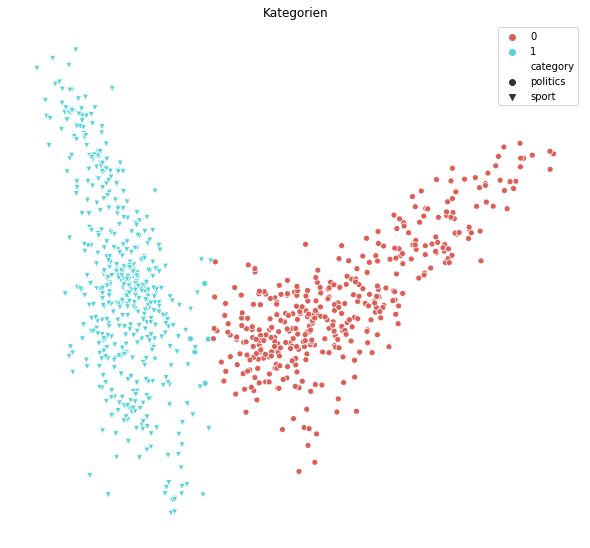

In [51]:
# perplexity = [2,5,10,30,40,50,100]

perplexity = [50]
for p in perplexity:
    X_embedded = TSNE(n_components=2, perplexity=p, early_exaggeration=30,learning_rate=50, verbose=2).fit_transform(tf_idf_array)
    visualize_tsne(X_embedded, prediction)

## GMM (Sport+Politics+Tech)

### Daten vorbereiten

In [52]:
data1 = df[(df.category=='sport')|(df.category=='politics')|(df.category=='tech')]
data.head(1)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
896,politics,001.txt,Labour plans maternity pay rise,Maternity pay for new mothers is to rise by £...,445.0,232.0,"matern pay for new mother is to rise by £1,40...","['_SP', 'NNP', 'NN', 'IN', 'JJ', 'NNS', 'VBZ',...",new new Other desperate full next new many fir...,47.0,27.0,8.0


In [53]:
data1.shape

(1329, 12)

In [54]:
tf_idf_vectorizor = TfidfVectorizer(max_features=1000,
                                    stop_words="english")
tf_idf = tf_idf_vectorizor.fit_transform(data1.content)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

### BIC und AIC

Text(0.5, 0, 'n_components')

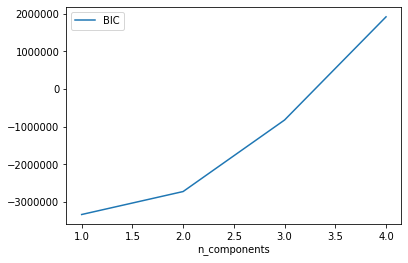

In [55]:
n_components = np.arange(1, 5)
models = [GaussianMixture(n, n_init=10, covariance_type='full', random_state=0).fit(tf_idf_array)
          for n in n_components]

plt.plot(n_components, [m.bic(tf_idf_array) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components')

Text(0.5, 0, 'n_components')

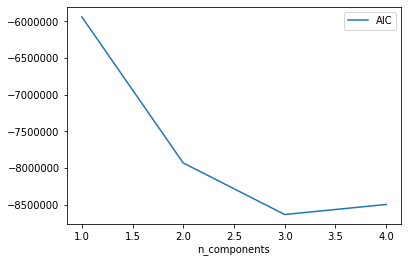

In [56]:
plt.plot(n_components, [m.aic(tf_idf_array) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [57]:
def compute_PCA(text):
    pca = PCA(n_components = 2)
    Y = pca.fit_transform(text)
    return Y

In [58]:
def plot_PCA(Y, prediction):
    plt.figure(figsize=(15,10))
    plt.scatter(Y[:, 0], Y[:, 1], c=prediction, s=50, cmap='viridis')
    plt.title('PCA')
#     plt.savefig('', bbox_inches = "tight")

### Hard Clustering

Visualisieren mit PCA

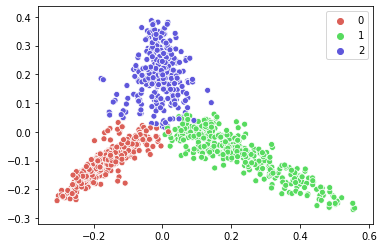

In [59]:
gmm = GaussianMixture(n_components=3, n_init=10, covariance_type='full').fit(tf_idf_array)
prediction = gmm.predict(tf_idf_array)
Y = compute_PCA(tf_idf_array)
sns.scatterplot(Y[:, 0], Y[:, 1],hue=prediction, palette=sns.color_palette("hls", len(np.unique(prediction))))

In [60]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[0.00513895 0.01200012 0.00214721 ... 0.01773991 0.00739881 0.01036343]
 [0.02079014 0.00776714 0.00683223 ... 0.01667154 0.00868528 0.00052708]
 [0.01941273 0.01259791 0.00904309 ... 0.01394908 0.00245621 0.00043869]]


[[[ 7.96751632e-04  9.46977673e-05 -5.86074417e-06 ... -5.24941542e-05
   -2.33484610e-05 -1.91685929e-05]
  [ 9.46977673e-05  1.22617938e-03 -2.28209033e-05 ...  5.29765492e-05
    5.41403150e-05  7.48076983e-05]
  [-5.86074417e-06 -2.28209033e-05  2.45133776e-04 ...  1.83628602e-05
   -4.64263905e-06  9.85379436e-06]
  ...
  [-5.24941542e-05  5.29765492e-05  1.83628602e-05 ...  1.23060779e-03
    6.31128516e-05 -1.05748241e-05]
  [-2.33484610e-05  5.41403150e-05 -4.64263905e-06 ...  6.31128516e-05
    9.40381708e-04  7.12818942e-05]
  [-1.91685929e-05  7.48076983e-05  9.85379436e-06 ... -1.05748241e-05
    7.12818942e-05  2.51201649e-03]]

 [[ 2.91591399e-03  2.30149358e-04  1.98733563e-04 ...  8.27486840e-05
   -5.48037117e-05  2.51533156e-05]
  [ 2.30149358e-04  4

### Soft Clustering

In [61]:
probs = gmm.predict_proba(tf_idf_array)
print(probs[:5].round(3))

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


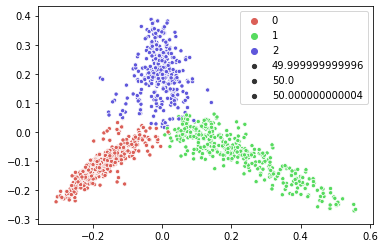

In [62]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
sns.scatterplot(Y[:, 0], Y[:, 1],hue=prediction, palette=sns.color_palette("hls", len(np.unique(prediction))), size=size)

Visualisieren mit TSNE

In [65]:
def visualize_tsne(X_embedded, hue):
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(frameon=False)
    plt.setp(ax, xticks=(), yticks=())
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    num = len(np.unique(hue))
    markers = ('o', 'v', '^', 's', 'p', '*','d', 'P', 'X')
    sns.scatterplot(Y[:, 0], Y[:, 1],hue=prediction, style=data1.category, markers=markers, palette=sns.color_palette("hls", len(np.unique(prediction))))
    plt.title("Kategorien")
    #plt.savefig("")
    plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1329 samples in 0.339s...
[t-SNE] Computed neighbors for 1329 samples in 3.478s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1329
[t-SNE] Computed conditional probabilities for sample 1329 / 1329
[t-SNE] Mean sigma: 0.394099
[t-SNE] Computed conditional probabilities in 0.127s
[t-SNE] Iteration 50: error = 196.1506958, gradient norm = 0.0254160 (50 iterations in 1.340s)
[t-SNE] Iteration 100: error = 196.1513977, gradient norm = 0.0341114 (50 iterations in 1.145s)
[t-SNE] Iteration 150: error = 196.1511230, gradient norm = 0.0326118 (50 iterations in 1.013s)
[t-SNE] Iteration 200: error = 196.1511536, gradient norm = 0.0332972 (50 iterations in 1.103s)
[t-SNE] Iteration 250: error = 196.1518250, gradient norm = 0.0410249 (50 iterations in 1.029s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 196.151825
[t-SNE] Iteration 300: error = 1.3510866, gradient norm = 0.0025169 (50 iterations in 

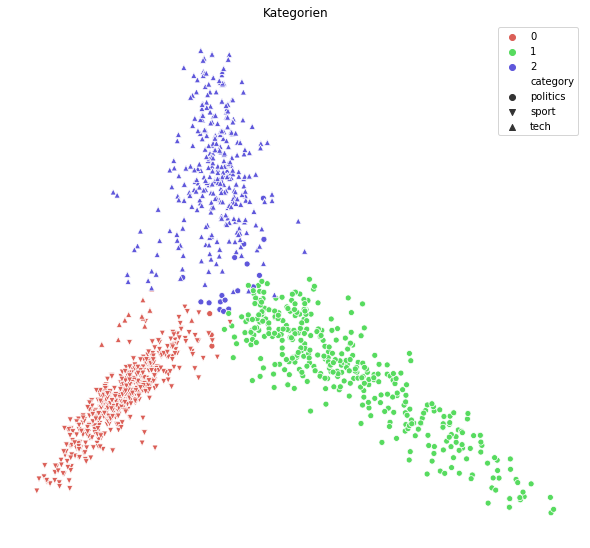

In [66]:
# perplexity = [2,5,10,30,40,50,100]

perplexity = [50]
for p in perplexity:
    X_embedded = TSNE(n_components=2, perplexity=p, early_exaggeration=30,learning_rate=50, verbose=2).fit_transform(tf_idf_array)
    #figname = "tsne_songtextegekuerzt_perplexity"+str(p)
    visualize_tsne(X_embedded, prediction)